# Tema 1
Ratings de lenguajes más populares en GitHub considerando el listado de los 20 lenguajes del índice TIOBE disponible en https://www.tiobe.com/tiobe-index/
# Python


In [5]:
# !pip install pandas
# !pip install BeautifulSoup
# !pip install request
# !pip install matplotlib

from bs4 import BeautifulSoup
import requests
import re
import pandas as pd


url_base = 'https://github.com/topics/'

#TIOBE
tiobe_pruebas = ['python', 'c','java','cpp','csharp','visual-basic','javascript','assembly','sql','php','r','delphi','go','swift','ruby','visual-basic-6','objective-c','perl','lua','matlab']
tiobe_lenguajes = ['python', 'C', 'Java', 'C++', 'C#','Visual Basic', 'JavaScript','Assembly language','SQL','PHP','R',
                   'Delphi/Object Pascal','Go','Swift','Ruby','Classic Visual Basic','Objective-C','Perl','Lua','MATLAB']
cant_repo_public = list()
rating_github = list()

# print(url_base+tiobe_lenguajes[0])



# Rating de GitHub de cada uno de los 20 lenguajes
Ordene descendentemente por RATING_GITHUB

In [6]:
for i in tiobe_pruebas:
    page = requests.get(url_base+i)
    soup = BeautifulSoup(page.content, 'html.parser')
    repo_public = soup.find_all('h2', class_= 'h3 color-fg-muted')
    for cant in repo_public:
        # print(cant.text)
        cant_repo_public.append([int(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+",cant.text.replace(',', ""))][0])
        # print(cant_repo_public)
#print(cant_repo_public)
df = pd.DataFrame({'Lenguaje':tiobe_lenguajes,'Repositorios Publicos':cant_repo_public} ,index=(range(1,21)))
valor_maximo = max(cant_repo_public)
valor_minimo = min(cant_repo_public)
#print(valor_maximo, valor_minimo)

for i in cant_repo_public:
        rating = ((i - valor_minimo) / (valor_maximo - valor_minimo) ) * 100
        rating_github.append(rating)

#print(rating_github)
df_rating_github =pd.DataFrame({'Lenguaje':tiobe_lenguajes,'Rating Github':rating_github,'Repositorios Publicos':cant_repo_public} ,index=(range(1,21)))
df_rating_github_descendente = df_rating_github.sort_values(by=['Rating Github'],ascending=False)
print(df_rating_github_descendente)


df.to_csv('Respuesta.csv')


                Lenguaje  Rating Github  Repositorios Publicos
7             JavaScript     100.000000                 305392
1                 python      90.005764                 274877
3                   Java      53.561112                 163602
10                   PHP      29.267406                  89427
5                     C#      15.269908                  46689
4                    C++      14.772735                  45171
2                      C      14.297832                  43721
13                    Go      13.603165                  41600
14                 Swift      11.058672                  33831
15                  Ruby       9.195090                  28141
11                     R       8.546275                  26160
9                    SQL       7.837197                  23995
20                MATLAB       3.131407                   9627
19                   Lua       3.110773                   9564
17           Objective-C       1.766309                

# Gráfico de barras
Para visualizar los 10 lenguajes con mayor número de apariciones entre los resultados.

<AxesSubplot:title={'center':'Lista de lenguajes'}, ylabel='Lenguaje'>

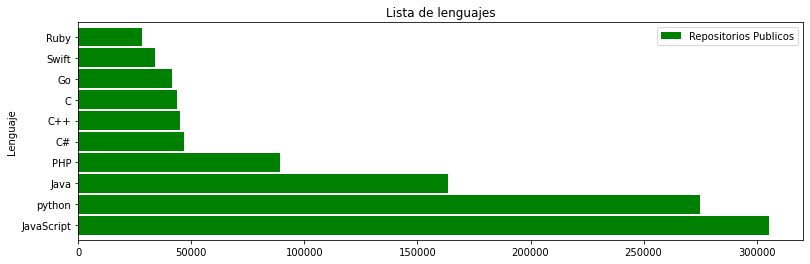

In [16]:
muestra = df_rating_github_descendente[:10].copy()
muestra.plot.barh(x='Lenguaje', y='Repositorios Publicos',
             title='Lista de lenguajes', color='green',width = 0.9 ,figsize=(13,4))